# 1 Gathering Data

In [84]:
import datetime as dt
import json
import numpy as np
import pandas as pd
import tweepy
import seaborn as sns
import requests
import re
from collections import Counter
import matplotlib.pyplot as plt

In [85]:
# import data from twitter archive
archive = pd.read_csv("twitter-archive-enhanced.csv")
archive.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [86]:
# import image predictions
tsv_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(tsv_url)

with open(tsv_url.split('/')[-1], mode = 'wb') as file:
    file.write(r.content)
images = pd.read_csv('image-predictions.tsv', sep = '\t')
images.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [87]:
# elements to save
elements = ['id', 'favorite_count', 'retweet_count']

# create dictionary
data = []
with open('tweet-json.txt' , encoding = 'utf-8') as r:
    json_tweet = r.readline()
    while json_tweet:
        # use json.loads convert json_tweet to a dictionary structure
        dictionnary = json.loads(json_tweet)
        data_row = dict((i, dictionnary[i]) for i in elements)
        data.append(data_row)
        json_tweet = r.readline()

# create Data Frame
json_tweets = pd.DataFrame.from_dict(data)

In [88]:
json_tweets.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


# 2 Assessing Data

2.1 Assessing archive

In [11]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
# get info
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
# check duplicate id
archive['tweet_id'].duplicated().sum()

0

In [14]:
# check whether all dog names are filled
archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
Sadie           8
the             8
Bailey          7
Daisy           7
Buddy           7
Toby            7
an              7
Bella           6
Oscar           6
Jax             6
Rusty           6
Jack            6
Dave            6
Stanley         6
Scout           6
Koda            6
Leo             6
Milo            6
Larry           5
             ... 
Joshwa          1
Clifford        1
Amélie          1
incredibly      1
JD              1
Theo            1
Sunshine        1
Spark           1
Jennifur        1
Wesley          1
Lucky           1
Florence        1
Finnegus        1
Wishes          1
Margo           1
Mutt            1
Arnold          1
Lilah           1
Aldrick         1
Mojo            1
Major           1
Fynn            1
his             1
Sprout          1
Tove      

In [15]:
# check whether rating_numerator is always filled
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
# count numbers of values in columns doggo, floofer, pupper and puppo
(archive.loc[:, 'doggo':'puppo'] != 'None').sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [18]:
# check sources
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

2.2 Assessing Image

In [19]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# check duplicate id
images.duplicated().sum()

0

In [22]:
images.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

2.3 Assessing json_tweets data

In [23]:
json_tweets.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


In [24]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [25]:
json_tweets.duplicated().sum()

0

2.4 Summary of Assessment

Quality-related factors

1.tweet_id has to be a string

2.Drop retweeting rows (null row)

3.NaN exist in following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_statud_timestamp

4.timestamp should be in datetime

5.'None' in doggo, floofer, pupper and puppo column treated as object, it should be treated as null value

6.doggo, floofer, pupper and puppo columns should be category data type

7.Some value in denominator column are not equal to 10

8.there are a lot of missing in "name" column

Tidiness-related factors

1.doggo, floofer, pupper and puppo column represents should be in one column

2.The archive, images dataframe, and the info dataframe should all be one dataframe

# 3 Cleaning

In [26]:
# copy dataframe
clean_archive=archive.copy()
clean_image=images.copy()
clean_json_tweets=json_tweets.copy()

3.1 Cleaning archive

(1) tweet_id has to be a string (solution: convert tweet_id datatype to string)

In [27]:
# convert tweet_id to string
clean_archive['tweet_id'] = clean_archive['tweet_id'].astype(str)
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

(2) Drop retweeting rows which are null (solution: remove retweeting rows)

In [28]:
# drop rows
clean_archive = clean_archive[clean_archive['in_reply_to_status_id'].isnull()]
clean_archive = clean_archive[clean_archive['retweeted_status_id'].isnull()]

(3) NaN exist in following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,
retweeted_statud_timestamp (solution: drop these colums)

In [68]:
# drop columns
clean_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace = True)

KeyError: "['in_reply_to_status_id' 'in_reply_to_user_id' 'retweeted_status_id'\n 'retweeted_status_user_id' 'retweeted_status_timestamp'] not found in axis"

In [69]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2080 non-null object
timestamp             2080 non-null datetime64[ns]
source                2080 non-null object
text                  2080 non-null object
expanded_urls         2077 non-null object
rating_numerator      2080 non-null int64
rating_denominator    2080 non-null int64
name                  1488 non-null object
stage                 2080 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 162.5+ KB


In [70]:
clean_archive.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None


(4) timestamp should be in datetime (solution: convert timestamp to datetime)

In [71]:
# convert timestamp to datetime
clean_archive['timestamp'] = pd.to_datetime(clean_archive['timestamp'])

(5) 'None' in doggo, floofer, pupper and puppo column treated as object, it should be treated as null value (solution: change None by NaN)

In [72]:
# change None by NaN
clean_archive['doggo']=clean_archive['doggo'].replace('None', np.nan)
clean_archive['floofer']=clean_archive['floofer'].replace('None', np.nan)
clean_archive['pupper']=clean_archive['pupper'].replace('None', np.nan)
clean_archive['puppo']=clean_archive['puppo'].replace('None', np.nan)

KeyError: 'doggo'

In [73]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2080 non-null object
timestamp             2080 non-null datetime64[ns]
source                2080 non-null object
text                  2080 non-null object
expanded_urls         2077 non-null object
rating_numerator      2080 non-null int64
rating_denominator    2080 non-null int64
name                  1488 non-null object
stage                 2080 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 162.5+ KB


6) doggo, floofer, pupper and puppo column represents should be in one column (Solution: create one column with doggo, floofer, pupper and puppo
columns)

In [74]:
# list to store data=
dog_list = []

# function to create a column with dog type
def dog_type(row):
    if row['doggo'] == 'doggo':
        # add to list
        dog_list.append('doggo')
    elif row['floofer'] == 'floofer':
        dog_list.append('floofer')
    elif row['pupper'] == 'pupper':
        dog_list.append('pupper')
    elif row['puppo'] == 'puppo':
        dog_list.append('puppo')
    else:
        dog_list.append('None')
        
clean_archive.apply(dog_type, axis=1)
clean_archive['stage'] = dog_list

KeyError: ('doggo', 'occurred at index 0')

In [75]:
clean_archive = clean_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

KeyError: "['doggo' 'floofer' 'pupper' 'puppo'] not found in axis"

In [76]:
clean_archive.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


In [77]:
clean_archive.stage.value_counts()

None       1744
pupper      221
doggo        83
puppo        23
floofer       9
Name: stage, dtype: int64

In [78]:
clean_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [79]:
clean_archive.name.value_counts()

a           54
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Winston      8
Sadie        8
Lola         8
the          8
Daisy        7
Toby         7
Jax          6
Oscar        6
Koda         6
Stanley      6
Bo           6
Bella        6
Bailey       6
Dave         5
Leo          5
Chester      5
Milo         5
an           5
Buddy        5
Louis        5
Scout        5
Bentley      5
Rusty        5
            ..
Beckham      1
Mauve        1
Carbon       1
Samsom       1
Fynn         1
Hurley       1
Major        1
Aldrick      1
Carper       1
Kane         1
BeBe         1
Jarod        1
Rose         1
O            1
Cedrick      1
Teddy        1
Chef         1
Ralphus      1
Kara         1
Lucky        1
Florence     1
Finnegus     1
Wishes       1
Margo        1
Mutt         1
Boston       1
Lilah        1
Terrance     1
Jennifur     1
Obi          1
Name: name, Length: 951, dtype: int64

7) Some value in denominator column are not equal to 10 (Solution: drop the remaining tweets with rating_denominator values that are NOT equal to
10)

In [80]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2080 non-null object
timestamp             2080 non-null datetime64[ns]
source                2080 non-null object
text                  2080 non-null object
expanded_urls         2077 non-null object
rating_numerator      2080 non-null int64
rating_denominator    2080 non-null int64
name                  1488 non-null object
stage                 2080 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 162.5+ KB


In [81]:
# display denominators
clean_archive.rating_denominator.value_counts().sort_index(ascending = False)

10    2080
Name: rating_denominator, dtype: int64

In [82]:
clean_archive = clean_archive[clean_archive.rating_denominator == 10]

In [83]:
# check the values in the column - should only be "10"
clean_archive.rating_denominator.value_counts().sort_index(ascending = False)

10    2080
Name: rating_denominator, dtype: int64

(8) name column got 745 None string (Solution:

In [45]:
# change None in 'Name' column by NaN
clean_archive['name']=clean_archive['name'].replace('None', np.nan)

In [46]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2080 non-null object
timestamp             2080 non-null datetime64[ns]
source                2080 non-null object
text                  2080 non-null object
expanded_urls         2077 non-null object
rating_numerator      2080 non-null int64
rating_denominator    2080 non-null int64
name                  1488 non-null object
stage                 2080 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 162.5+ KB


In [47]:
clean_archive.name.value_counts()

a           54
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Winston      8
Sadie        8
Lola         8
the          8
Daisy        7
Toby         7
Jax          6
Oscar        6
Koda         6
Stanley      6
Bo           6
Bella        6
Bailey       6
Dave         5
Leo          5
Chester      5
Milo         5
an           5
Buddy        5
Louis        5
Scout        5
Bentley      5
Rusty        5
            ..
Beckham      1
Mauve        1
Carbon       1
Samsom       1
Fynn         1
Hurley       1
Major        1
Aldrick      1
Carper       1
Kane         1
BeBe         1
Jarod        1
Rose         1
O            1
Cedrick      1
Teddy        1
Chef         1
Ralphus      1
Kara         1
Lucky        1
Florence     1
Finnegus     1
Wishes       1
Margo        1
Mutt         1
Boston       1
Lilah        1
Terrance     1
Jennifur     1
Obi          1
Name: name, Length: 951, dtype: int64

3.2 Cleaning image

(1) convert id datatype to string

In [48]:
# convert tweet_id to string
clean_image['tweet_id']=clean_image['tweet_id'].astype(str)

In [49]:
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


(2) convert p1 ,p2, and p3 to category.

In [50]:
# convert p1 ,p2, and p3 to category.
clean_image.p1 = clean_image.p1.astype('category')
clean_image.p2 = clean_image.p2.astype('category')
clean_image.p3 = clean_image.p3.astype('category')

In [51]:
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(1), object(2)
memory usage: 174.9+ KB


3.3 Cleaning json_tweets

(1) convert id datatype to string

In [52]:
# convert id to string
clean_json_tweets['id']=clean_json_tweets['id'].astype(str)

In [53]:
clean_json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null object
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


3.4 Merging data

In [54]:
# merge by id with image
df_final = clean_image.merge(clean_archive, left_on='tweet_id',right_on='tweet_id',how='inner')
df_final = df_final.merge(clean_json_tweets,left_on='tweet_id',right_on='id',how='inner')
# suppress unnecessary column
df_final = df_final.drop(['id'], axis=1)

Store data

In [55]:
df_final.to_csv('twitter_archive_master.csv',index=False)

# 4 Analyzing and Visualizing

In [56]:
df_final.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,None,2535,532
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,132,48
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,128,47
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,311,147
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,None,111,41


Basic statistic

In [58]:
#table below describe basis statistic (count, mean, std, etc)
df_final.describe().round(5)

,img_num,p1_conf,p2_conf,p3_conf,rating_numerator,rating_denominator,favorite_count,retweet_count
count,1954.00000,1954.00000,1954.00000,1954.00000,1954.00000,1954.0,1954.00000,1954.00000
mean,1.20215,0.59406,0.13490,0.06011,11.70061,10.0,8971.32907,2785.85875
std,0.55940,0.27234,0.10116,0.05081,41.07959,0.0,12302.22578,4705.35305
min,1.00000,0.04433,0.00000,0.00000,0.00000,10.0,81.00000,16.00000
25%,1.00000,0.36266,0.05362,0.01599,10.00000,10.0,1960.50000,624.75000
50%,1.00000,0.58744,0.11759,0.04948,11.00000,10.0,4148.00000,1366.50000
75%,1.00000,0.84690,0.19622,0.09155,12.00000,10.0,11414.75000,3243.00000
max,4.00000,1.00000,0.48801,0.27104,1776.00000,10.0,132810.00000,79515.00000


Correlation

In [59]:
#below table descrip correlation between variable
df_final.corr()

,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,rating_numerator,rating_denominator,favorite_count,retweet_count
img_num,1.000000,0.202522,0.031533,-0.157811,0.056725,-0.137058,0.058531,-0.000061,NaN,0.136315,0.106219
p1_conf,0.202522,1.000000,0.126150,-0.509680,0.143707,-0.708802,0.118495,-0.009121,NaN,0.079737,0.055492
p1_dog,0.031533,0.126150,1.000000,0.110692,0.638593,0.049569,0.560949,-0.029893,NaN,0.055028,0.009204
p2_conf,-0.157811,-0.509680,0.110692,1.000000,0.096548,0.478939,0.065179,-0.013790,NaN,-0.022515,-0.019305
p2_dog,0.056725,0.143707,0.638593,0.096548,1.000000,0.030248,0.560042,-0.034936,NaN,0.060154,0.014727
p3_conf,-0.137058,-0.708802,0.049569,0.478939,0.030248,1.000000,0.035929,-0.004836,NaN,-0.053496,-0.045210
p3_dog,0.058531,0.118495,0.560949,0.065179,0.560042,0.035929,1.000000,-0.031117,NaN,0.042568,0.011931
rating_numerator,-0.000061,-0.009121,-0.029893,-0.013790,-0.034936,-0.004836,-0.031117,1.000000,NaN,0.015885,0.018534
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorite_count,0.136315,0.079737,0.055028,-0.022515,0.060154,-0.053496,0.042568,0.015885,NaN,1.000000,0.913125


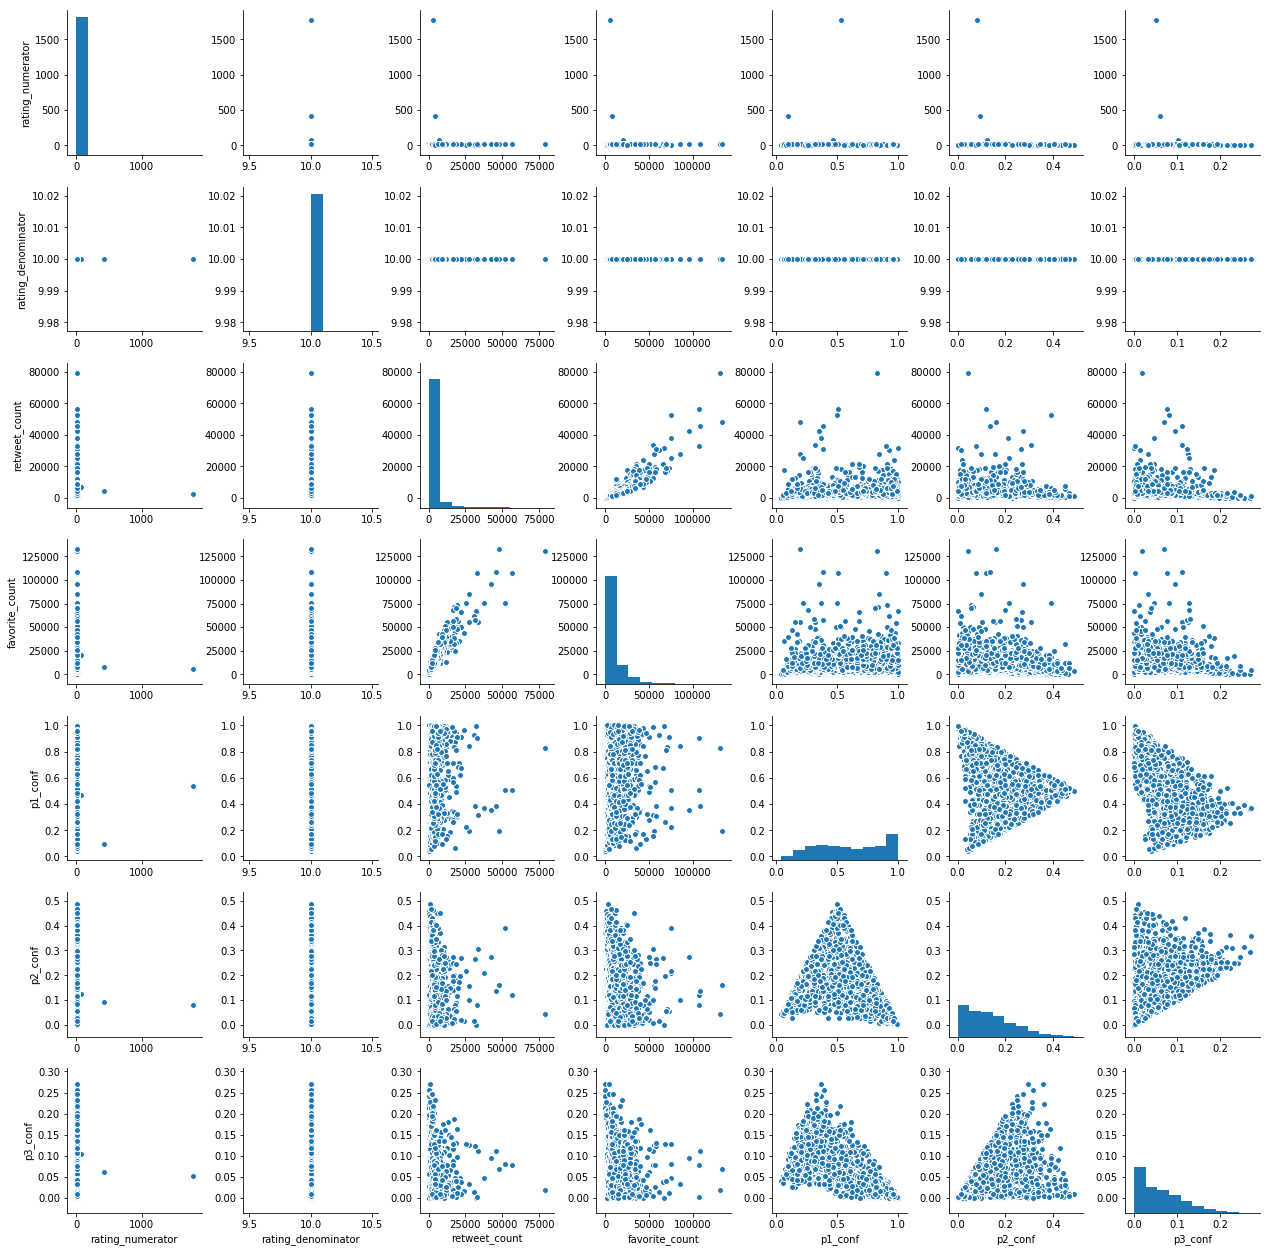

In [61]:
#Below overall visualisation of correlation amoung variable
sns.pairplot(df_final, vars=["rating_numerator", "rating_denominator", "retweet_count", "favorite_count","p1_conf", "p2_conf", "p3_conf"]);

Distribution (Rating, favourite count, and retweet count)

In [62]:
df_final['rating_numerator'].value_counts()

12      446
10      417
11      392
13      253
9       149
8        95
7        51
5        33
14       33
6        32
3        19
4        15
2         9
1         4
1776      1
420       1
26        1
27        1
75        1
0         1
Name: rating_numerator, dtype: int64

Text(0.5,1,'Ratings Distribution')

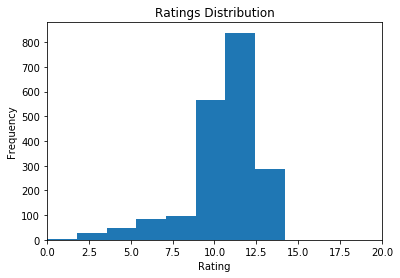

In [63]:
#create histogram for Rating
plt.hist(x = df_final.rating_numerator, bins = 1000)
plt.xlim(0,20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ratings Distribution')

Based on the graph above, the highest frequency of ratings are 12.

Text(0.5,1,'Distribution of favorite_count')

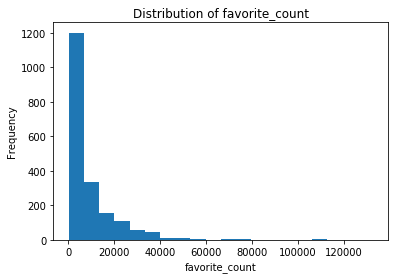

In [64]:
# plot histogram for favorite count
plt.hist(x = df_final.favorite_count, bins = 20)
plt.xlabel('favorite_count')
plt.ylabel('Frequency')
plt.title('Distribution of favorite_count')

Text(0.5,1,'Distribution of retweet_count')

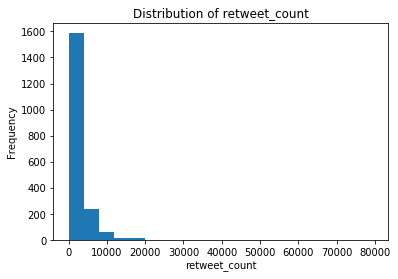

In [65]:
# plot histogram for retweet count
plt.hist(x = df_final.retweet_count, bins = 20)
plt.xlabel('retweet_count')
plt.ylabel('Frequency')
plt.title('Distribution of retweet_count')

Both distribution of favorite_count and retweet_count are similarly observed. Thus, plot scatter has been conducted between this two variables to see detail relationship.

Text(0,0.5,'retweet_count')

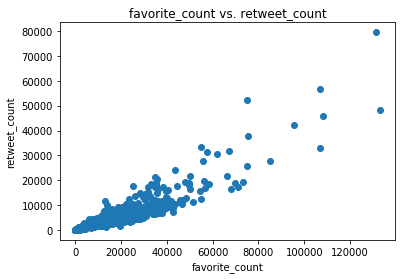

In [66]:
# plot scatter plot between favorite count and retweet count
plt.scatter(df_final.favorite_count, df_final.retweet_count);
plt.title('favorite_count vs. retweet_count')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')

In [67]:
df_final['favorite_count'].corr(df_final['retweet_count'])

0.91312500887338055

There is strong positive correlation between retweet count and favorite count with the correlation 0.91